# Intro to NumPy

-  [based on this numpy quickstart guide](https://docs.scipy.org/doc/numpy/user/quickstart.html)

-  [full list of routines](https://docs.scipy.org/doc/numpy-dev/reference/routines.html#routines)

In [1]:
# import numpy lib and other libs for this tutorial
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# set up an array and figure out shape...
my_array = np.arange(10)
print(my_array)
my_array.shape     

[0 1 2 3 4 5 6 7 8 9]


(10,)

In [3]:
# reshape array
my_array = my_array.reshape(2,5)   # why is (2,5) and (5,2) ok but (2,6) not ok? 
my_array.shape   

(2, 5)

In [ ]:
# neat trick...can also reshape with 'shape' and use a -1 which means 'whatever works' 
my_array = np.arange(42)
my_array.shape = 2,3,-1  
my_array.shape

In [ ]:
print('Dims of data: ', my_array.ndim)              # number of dims
print('Name of data type: ', my_array.dtype.name)   # name of data type (float, int32, int64 etc)
print('Size of each element (bytes): ', my_array.itemsize)          # size of each element in bytes
print('Total number of elements in array: ', my_array.size)         # total number of elements in array

In [ ]:
float_array = np.array([1.1,2,3])  # will infer data type based on input values...here we have 1 float so the whole thing is float
float_array.dtype.name             # or np.dtype

## Or you can explicitly declare the data type

In [ ]:
int_array = np.array([ [1,2,3], [6,7,8]], dtype = 'int64')   # complex, float32, float64, int32, uint32 (unsigned int32), etc
int_array.dtype
int_array

<div class="alert alert-success">
what happens if you initialize with floating point numbers but you declare an int data type?
</div>

In [4]:
int_array = np.array([[1.1,2.7,3.4], [6.9,7.5,8.2]], dtype = 'int64')   # complex, float32, float64, int32, uint32 (unsigned int32), etc
int_array

array([[1, 2, 3],
       [6, 7, 8]])

## Allocate arrays of zeros, ones or rand to reserve the memory before filling up later 

<div class="alert alert-info">
handy when you know what size you need, but you're not ready to fill it up yet...saves you from dynamically resizing the matrix during analysis, which is very slow
</div>

In [ ]:
zero_array = np.zeros( (3,4) )   # note the () around the dims, and default type is float64
zero_array.dtype

# explicilty declare data type
zero_array = np.zeros( (3,4), dtype=np.int32)   # note can use np.dtype instead of 'dtype'
print('Data type:', zero_array.dtype)

In [5]:
# ones
np.ones( (4,4,4), dtype=np.float64 )           # note the 3D output below...4, 4x4 squares of floating point 1s...

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [6]:
# and empty...not really 'empty' but initialized with varible output determined by current state of memory
np.empty( (2,2,2), dtype = np.float32)

array([[[1.e-45, 0.e+00],
        [1.e-45, 0.e+00]],

       [[1.e-45, 0.e+00],
        [0.e+00, 0.e+00]]], dtype=float32)

### Can also create sequences of numbers using arange...

In [ ]:
seq_array = np.arange(10)    # 0-9...remember - counting starts at 0! 
print(seq_array)

In [ ]:
seq_array = np.arange(0,30,5)     # start, stop (stop at < X), step size
print(seq_array)

In [ ]:
seq_array = np.arange(0,10,.5)    # decimal input is ok too
print(seq_array)

<div class="alert alert-info">
Because of machine precision issues, sometimes hard to predict how many elements will end up in an array when initialized using arange...so often better to specify a sequence based on start point, stop point, and the exact number of elements that you want (or the number of steps between start and stop). linspace (linear spacing) is the function to do this, and note that unlike arange that ends < stop point, linspace will always end exactly at the specified stop point. 
</div>

In [ ]:
lin_array = np.linspace(0,20,9)
print(lin_array)

### Common use of linspace in this class...eval a function over an interval. quick intro to basic plotting here too...

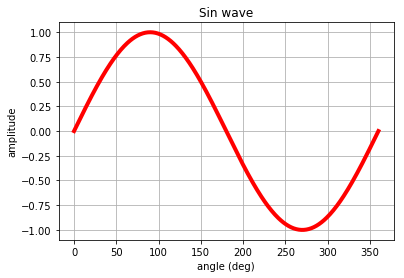

In [7]:
lin_array = np.linspace(0, 2*pi, 360)
sin_wave = np.sin(lin_array)

# plotting
fig, ax = plt.subplots()               # create subplot
ax.plot(lin_array*180/pi, sin_wave, 'r-', linewidth = 4)    # specify x,y data...convert rad to deg for x-axis

# label each axis and give it a title
ax.set(xlabel='angle (deg)', ylabel='amplitude',
       title='Sin wave')

# grid?
ax.grid()

# save the figure if you want to local working directory
fig.savefig("sin.pdf")   # png, eps, pdf...

# show it!
plt.show()

### a bit more on initializing arrays with random numbers...use np.random.rand and np.random.randn

In [8]:
rand_array = np.random.rand(1,16)   # drawn from uniform over [0,1]
print(rand_array)

[[0.52323635 0.08608984 0.93273588 0.73946683 0.52613179 0.10709134
  0.8012804  0.29862322 0.8705749  0.55896311 0.18161438 0.65102006
  0.71952321 0.49371751 0.03304428 0.68927385]]


In [9]:
rand_array = np.random.randn(2,6)   # drawn from normal with mean 0 and variance 1
print(rand_array)

[[ 0.36504509  0.00466338  1.14065716 -0.84713485  1.34759133  1.74197738]
 [ 0.32572368 -0.06686771  1.42992029  0.68690773  0.05738339  1.00903167]]


### use randn to generate draws from a normal distribtion with mean = mu and variance = sig and then plot...

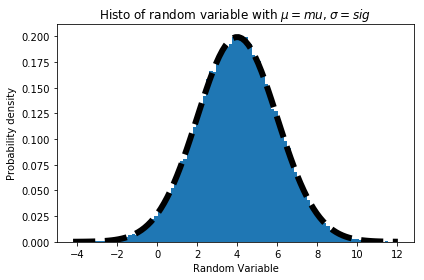

In [14]:
# shift the mean and scale the variance for a N(mu,var)
samples = 100000
mu = 4
sig = 2
rand_array = (sig * np.random.randn(samples,1)) + mu   # drawn from normal with mean mu and variance sig
rand_array

# plot
num_bins = 100

fig, ax = plt.subplots()

# generate the histogram
n, bins, patches = ax.hist(rand_array, num_bins, density=1)

# generate a pdf evaled at 'bins' to draw a smooth function - this works because we used randn to generate the data
y = norm.pdf(bins, mu, sig)
ax.plot(bins, y, 'k--', linewidth = 6)
ax.set_xlabel('Random Variable')
ax.set_ylabel('Probability density')
ax.set_title('Histo of random variable with $\mu=mu$, $\sigma=sig$')

# change spacing so that labels are visible
fig.tight_layout()
plt.show()


### Printing arrays

<div class="alert alert-info">
like displaying as a nested list but (1) last axis printed l to r, (2) second to last from top to bottom (3) rest are also top to bottom but each slice is printed in a separate block
</div>

In [15]:
print_array = np.arange(20)
print(print_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [16]:
print_array = np.linspace(0,359,360).reshape(6,60)
print(print_array)

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.]
 [ 60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
   74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
   88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101.
  102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
  116. 117. 118. 119.]
 [120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
  134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
  148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
  162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
  176. 177. 178. 179.]
 [180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 

In [17]:
# see how last dim (2) is left to right, then next to last dim is top to bottom, then first dim is top to bottom
# but each slice is a separate block 
print_array = np.arange(24).reshape(4,3,2)
print(print_array)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


In [18]:
# if output too long then will just print the first bit and the last bit
print(np.linspace(1,10000,10000))

[1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]


### Simple elementwise arithmetic operations like + and - work on corresponding elements of arrays. More on linear algebra in other tutorial

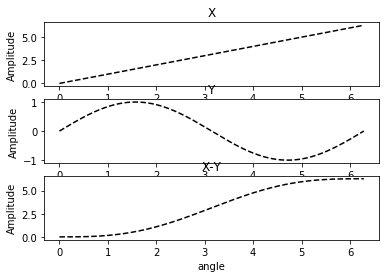

In [20]:
x = np.linspace(0,2*pi,360)
y = np.sin(x)

#print(x-y)

plt.subplot(3, 1, 1)
plt.plot(x, x, 'k--')
plt.title('X')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(x, y, 'k--')
plt.title('Y')
plt.xlabel('angle')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(x, x-y, 'k--')
plt.title('X-Y')
plt.xlabel('angle')
plt.ylabel('Amplitude')

plt.show()

### Operations that modify an existing array


In [21]:
x = np.ones((1,10))
x += 3
print(x)
x *= 2
print(x)

[[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]]
[[8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]]


<div class="alert alert-info">
when dealing with muliple arrays of different data types, resulting array will take the form of the highest precision input array (upcasting)!
</div>

In [22]:
x = np.arange(10, dtype='int32')
print('x data type: ', x.dtype)
y = np.random.randn(1,10)
print('y data type: ', y.dtype)

# now multiply the int32 array with the float64 array and answer should be the higher precision of the two (float64)
z = x * y 
print(z)
print('z data type: ', z.dtype)

# another exp, float64 upcast to complex128
w = np.exp(z*1j)
print('w data type: ', w.dtype)     

x data type:  int32
y data type:  float64
[[-0.          0.19025011 -1.5724434  -4.38316009  3.89821517  1.36164834
  -5.29277796  7.67191934 -0.9475024   1.31086377]]
z data type:  float64
w data type:  complex128


### Unary operations implemented as methods of the ndarray class

In [ ]:
x = np.arange(10).reshape(2,5)   # 2 x 5 matrix
print(x)
x.sum()                          # sum of all elements
print(x.sum(axis=0))             # sum of each column (across 1st dim)
print(x.sum(axis=1))             # sum of each row (across 2nd dim)
print(x.sum(0))                  # don't need the axis arg

### Other common operations...

0.0171910910802201
[0.12040186 0.01719109 0.163393  ]
[0.84366823 0.7272076  0.58114862 0.73578251 0.76415778 0.6734966
 0.96305928 0.69439332 0.97263587 0.51209778 0.89137434 0.83856618]
[[0.84366823 0.15989983 0.09599319]
 [0.7272076  0.33984899 0.05552895]
 [0.58114862 0.13766829 0.02854413]
 [0.73578251 0.04649002 0.02334226]
 [0.76415778 0.55515543 0.19694249]
 [0.62980593 0.10909864 0.07347756]
 [0.12040186 0.0667007  0.06423673]
 [0.69439332 0.44985178 0.19056841]
 [0.97263587 0.4975875  0.15971082]
 [0.32224878 0.16502289 0.05337923]
 [0.88576421 0.36691965 0.32706276]
 [0.83856618 0.01441587 0.00589392]]


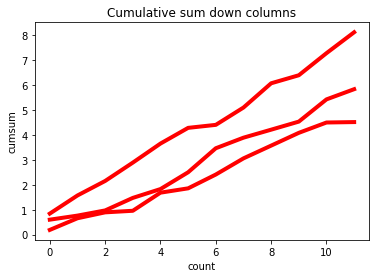

In [23]:
x = np.random.rand(12,3)  
print(x.min())           # min of entire matrix
print(x.min(0))          # min across 1st dim
print(x.max(1))          # max across 2nd dim
print(x.cumprod(1))      # cumulative product across 2nd dim
y = x.cumsum(0)          # cumulative sum across 1st dim

r,c = y.shape
fig, ax = plt.subplots()               # create subplot
ax.plot(np.arange(r), y, 'r-', linewidth = 4)    

# label each axis and give it a title
ax.set(xlabel='count', ylabel='cumsum',
       title='Cumulative sum down columns')

plt.show() 

### Universal functions...sin, exp, corrcoef, etc

In [ ]:
N = 30
x = np.linspace(0,9,N)

print(np.exp(x))
print(np.sqrt(x))
print(np.add(x, x+2))                 # add two same-sized arrays
y = x + np.random.randn(1,len(x))*3   # make a second vector x + some randn noise 
print(np.corrcoef(x, y))              # correlation matrix

hndl = plt.scatter(x, y, s=50, c='green', alpha=1, label="X vs Y")  # note alpha or transparency
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=2)   # 1-4 for each corner of the plot
plt.show()

# all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj, corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum, mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose, var, vdot, vectorize, where

### Set logic....

In [ ]:
XXXXXXX

### Shape manipulation

In [ ]:
x = np.round(np.random.randn(6,8)*5)   # generate some random data from N(0,5), then round 

# flatten the array - note that ravel produces a copy of the data
y = x.ravel()   
print('Shape of x: ', x.shape, '\nShape of flattened x:', y.shape)  # newline example + multiple outputs...

# there is also 'flatten', which is like ravel but creates a separate copy of teh data. 

# reshape
x = x.reshape(12,4)   # 48 element array reshaped from a 6x8 to a 12x4

# transpose - swap row/column
print(x.T)
print('Reshaped x: ', x.shape, '\nReshaped x transposed: ', x.T.shape)

### Concatenating arrays (stacking)

In [ ]:
x = np.floor(np.random.rand(5,6)*10)
y = np.ceil(np.random.rand(5,6)*2)

# vertical stacking of arrays...will make a 10x6
z = np.vstack((x,y))
print('shape of z after vert stacking x,y: ', z.shape)

# horizontal stacking of arrays...will make a 5x12
z = np.hstack((x,y))
print('shape of z after horizontal stacking x,y: ', z.shape)

# concatenate allows stacking along specified dim
z = np.concatenate((x,y),axis=0)   # vstack - stack rows on top of each other
print('shape of z after vertical concat x,y: ', z.shape)

z = np.concatenate((x,y),axis=1)   # hstack - stack columns next to each other
print('shape of z after horizontal concat x,y: ', z.shape)

# create arrays using r_ and c_
x = np.r_[0:3,10,11]
print('row concat using r_ ', x)

### Copies and reasignments...this is important because failure to understand this can have unintended consequences 

In [ ]:
x = np.arange(12)
y = x            # creates another name for x
y is x           # y and x are the same object

y.shape = 3,4    # because y is another name for x, this changes shape of x
x.shape          # now x is a different size...  

#### if you want to make a new object that looks at the same data...

In [ ]:
x = np.linspace(0,9,10)

y = x.view()

print(y is x)        # no...

print(y.base is x)   # yes, cause looking at the same data. 

# so you can change the shape of y and not affect x
y.shape = 2,5
print('Shape of x: ', x.shape, ' Shape of y: ', y.shape)

# but since the data is shared, changing data in y changes data in x
y[0,0] = 1000
print(x[0,])

#### Deep copy - make a complete copy of an array and its data...not just a view

<div class="alert alert-warning">
changing the copy will NOT change the original...and this is often a very desirable feature!
</div>

In [ ]:
z = x.copy()
print(z is x)       # not the same
print(z.base is x)  # does not share the same data

z[0] = -999         # since z is an independent copy, changing the data in z does not change x

print(x)